# Задача 1. Уникальные ip


Дан файл `access_log.txt`, строки которого начинаются с ip пользователей. Найти:

1. количество уникальных ip
2. 5 самых часто встречающихся и то, сколько раз они встречаются.

In [66]:
import pandas as pd

df = pd.read_csv("access_log.txt", sep=" - - ", header= None)

df = df[0]
print(f'Уникальное количество IP:{len(df.unique())}')


C:\Users\Kosarev_G\AppData\Local\Temp\ipykernel_20984\857264250.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("access_log.txt", sep=" - - ", header= None)


Уникальное количество IP:2298


In [69]:
# Топ 5 самых часто встречающихся IP
df.value_counts().nlargest(5)

193.106.31.130    44978
173.255.176.5      5220
178.44.47.170      2824
51.210.183.78      2684
45.15.143.155      1927
Name: 0, dtype: int64

# Задача 2. Класс

Напишите класс для интегрирования функций одной переменной без особенностей на конечном интервале. 
Что у класса должно быть: 
    
1. Выбор способа интегрирование: `trapeze` и `rectangle` (интегрирование методом трапеций и прямоугольников соответственно)
    
2. Явное указание интервала интегрирования и количества отрезков, на которые этот интервал разбивается

3. Возможность передать любую функцию одной переменной (которая на вход принимает вещественное число и возвращает тоже вещественное число), предполагается, что функция особенностей не имеет


Пример вызова:

    trapeze_integrator = Integrator(-1, 1, 1000, 'trapeze')

    x3 = lambda x: x\*\*3

    trapeze_integrator.integrate(x3)
    
Ну и результат такого интегрирования должен быть разумным) Для примера должно получиться что-то около 0.

In [77]:
class Integrator:
    def __init__(self, a, b, n, method='trapeze|rectangle'):

        self.a = a # Начало интервала интегрирования
        self.b = b # Конец интервала интегрирования
        self.n = n # Количество отрезков, на которые разбивается интервал
        self.method = method #Метод интегрирования ('trapeze' или 'rectangle')

    def integrate(self, func):

        if self.method == 'trapeze':
            integral = self.trapezoidal_integration(func)
        elif self.method == 'rectangle':
            integral = self.rectangle_integration(func)
        else:
            raise ValueError("Неподдерживаемый метод интегрирования")

        return integral

    def trapezoidal_integration(self, func):

        h = (self.b - self.a) / self.n
        integral = 0.5 * (func(self.a) + func(self.b))

        for i in range(1, self.n):
            integral += func(self.a + i * h)

        integral *= h
        return integral

    def rectangle_integration(self, func):

        h = (self.b - self.a) / self.n
        integral = 0

        for i in range(self.n):
            x_i = self.a + i * h
            integral += func(x_i)

        integral *= h
        return integral



# Задача 3. NumPy

Вам дан массив с числами размера $x*n$ (это размер столбца) на $m$. Напишите функцию `bucket_aggregate(arr: np.array, x: int)-> np.array`, которая делает следующее преобразование:

Каждый столбец разбивается на x бакетов одинаковой длины n и внутри каждого бакета считается среднее значение.
На выходе получается массив размера $n$ на $m$. Гарантируется, что длина столбца входного массива нацело делится на x. ("корректную" работу для массива 10\*10 и 3 бакетов предусматривать не обязательно). Ошибки вычислений, связанные с ограниченной точностью типа Float, пытаться вылечить не обязательно.

**Пример**

**Вход**

Массив **a**

1 1 1

2 3 3

4 5 6
 
1 2 3


**Применение**

    bucket_aggregate(a, 2)
    
**Выход**

1.5 2   2

2.5 3.5 4.5



In [88]:
import numpy as np

def bucket_aggregate(arr, x):
    # Получить размеры исходного массива
    n, m = arr.shape
    
    # Рассчитать размер бакетов
    bucket_size = n // x
    
    # Инициализировать результирующий массив с нулями
    result = np.zeros((bucket_size, m))
    
    # Разбить каждый столбец на бакеты и вычислить средние значения
    for i in range(bucket_size):
        start = i * x
        end = (i + 1) * x
        bucket = arr[start:end, :]
        result[i, :] = np.mean(bucket, axis=0)
    
    return result



In [90]:
aboba = np.random.randint(low=0, high=100, size=(5, 3), dtype=int)

bucket_aggregate(aboba, 2)

array([[47.5, 47.5, 23.5],
       [28. , 76. , 60.5]])

# Задача 4. Про pandas

Дан датафрейм, содержащий распаршенную с сайта reverb информацию об объявлениях о продаже электрогитар.
Поля там такие:

`title` - заголовок объявления
`description` и `text` - что-то из описания объявления
`price` - цена в долларах
`params_dict` - словарь параметров (чтобы считать его, можете воспользоваться `eval`)

Вопросы:

1. Сколько возможных ключей есть в params_dict
2. Какой инструмент самый дорогой и сколько он стоит
3. Какой самый частый бренд (если известен)
4. Можно ли сказать, что стоимость инструмента брендов Fender и Gibson зависит от года производства? если да, то как? (ответом будет график)


In [91]:
guitar = pd.read_csv("reverb.csv")
guitar.head()

,Unnamed: 0,title,description,text,param_dict,price
0,0,Fender American Standard Stratocaster [XIX19] ...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,"$1,131.92"
1,1,"Fender ""American Vintage II 1951 Telecaster"" 3...",The Fender® American Vintage II series present...,The Fender® American Vintage II series present...,{'Condition': 'Brand New (New)Brand New items ...,"$1,935.55"
2,2,Rebel Custom Guitars Funky Claude 2022 - Hydro...,Stratocaster Style Custom Guitar by Rebel Cust...,Stratocaster Style Custom Guitar by Rebel Cust...,{'Condition': 'Brand New (New)Brand New items ...,"$1,055.53"
3,3,Fender AMERICAN PROFESSIONAL Stratocaster [MJ8...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,"$1,290.62"
4,4,G&L S-500 Premium C.F.S [MJ724] | Reverb,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,$575.55


In [92]:
def dict_2_str(abiba):
    pars = abiba.split('\'')
    print(pars)
    norm_dict = dict()
    for cnt, value in enumerate(pars):
        if value == ': ':
            norm_dict[pars[cnt - 1]] = pars[cnt+1]

    return norm_dict

In [ ]:
guitar['norm_dict'] = guitar['param_dict'].apply(dict_2_str)

In [100]:
keys_set = set()

for dict in guitar['norm_dict']:
    for key in dict.keys():
        keys_set.add(key)

print(keys_set)
print(len(keys_set))

{'Fretboard Material', 'Model', 'Color Family', 'Nut Width', 'Wood Top Style', 'Bridge/Tailpiece Type', 'Model Family', 'Body Type', 'Neck Material', 'Pickup Configuration', 'Number of Strings', 'Frets', 'Artist', 'Scale Length', 'Right / Left Handed', 'Year', 'Brand', 'Fretboard Radius', 'Body Material', 'Offset Body', 'Finish Features', 'Body Shape', 'Condition', 'Series', 'Top Material', 'Model Sub-Family', 'Neck Construction', 'Categories', 'Number of Frets', 'Made In', 'Product Family', 'Finish', 'Finish Style'}
33


## 2

In [101]:
guitar['price_norm'] = guitar['price'].apply(lambda x: float(x.replace('$', '').replace(',', '').strip()))

In [102]:
most_expensive = guitar[guitar['price_norm'] == max(guitar['price_norm'])]
most_expensive

,Unnamed: 0,title,description,text,param_dict,price,norm_dict,price_norm
17127,17127,Eric Clapton | Reverb,A unique offer for the complete collection of ...,A unique offer for the complete collection of ...,{'Condition': 'Mint (Used)Mint items are in es...,"$387,363.74",{'Condition': 'Mint (Used)Mint items are in es...,387363.74


In [104]:
brand = most_expensive['norm_dict'][17127]['Brand']
model = most_expensive['norm_dict'][17127]['Model']
price = most_expensive['price_norm'][17127]
print(f'{brand} {model} - {price}')


Gibson Eric Clapton - 387363.74


## 3

In [105]:
def field_from_dic(dict, key):
    try:
        brand = dict[key].strip()
    except KeyError:
        brand = None

    return brand

In [107]:
guitar['brand'] = guitar['norm_dict'].apply(lambda x: field_from_dic(dict=x,key='Brand'))

In [108]:
# топ-10 брендов по кол-ву объявлений
guitar['brand'].value_counts().nlargest(10)

Fender      3250
Gibson      2237
Ibanez      1006
PRS          796
Epiphone     640
Squier       391
Gretsch      356
Schecter     348
ESP LTD      282
Tokai        279
Name: brand, dtype: int64

## 4

In [110]:
guitar['year'] = guitar['norm_dict'].apply(lambda x: field_from_dic(dict=x,key='Year'))
guitar['len_year'] = guitar['year'].apply(lambda x: len(x.strip()) if x else None)
ndf = guitar[guitar['brand'].isin(['Fender', 'Gibson'])][['price_norm', 'year', 'len_year']]

In [111]:
ndf['len_year'].value_counts()

4.0     3437
11.0     402
14.0     114
9.0       88
5.0       44
7.0       37
6.0       11
10.0       5
3.0        5
12.0       2
13.0       2
24.0       2
18.0       2
21.0       2
2.0        2
19.0       1
8.0        1
1.0        1
15.0       1
Name: len_year, dtype: int64

In [112]:
def year(year):
    if year:
        year = year.strip()
        length = len(year)
        out_year = None
        if length == 4:
            out_year = int(year)
    else:
        out_year = None
    return out_year

In [115]:
ndf['year_norm'] = ndf['year'].apply(year)

In [116]:
df_corr = ndf[['price_norm', 'year_norm']][~ndf['price_norm'].isna() & ~ndf['year_norm'].isna()].reset_index(drop=True)

In [117]:
df_corr.corr()

,price_norm,year_norm
price_norm,1.000000,-0.403779
year_norm,-0.403779,1.000000


<AxesSubplot:xlabel='price_norm', ylabel='year_norm'>

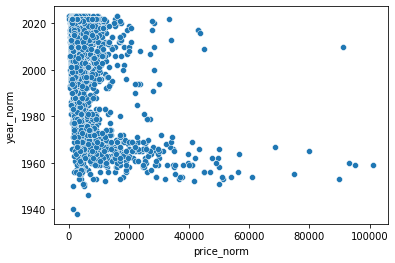

In [119]:
import seaborn as sb

sb.scatterplot(data=df_corr, x=df_corr['price_norm'], y=df_corr['year_norm'])

# Задача 5. Про парсинг информации

Есть сайт https://nplus1.ru/ , новости за дату на нем можно увидеть на страницах типа https://nplus1.ru/news/2023/03/28

Используя парсер, посчитайте суммарную длину текстов статей (в количестве слов или в количестве символов, как вам будет удобнее), которые были на N+1 в списке новостей в Июле 2023 года (пройтись по всем датам июля, собрать тексты статей, посчитать длину в словах/символах). 

Пользуйтесь любыми удобными вам библиотеками

## !!!!

Я не успел доделать. Меня выбил из сил JSON, который не хотел распарсиваться. Я оставил красивый код, как бы я это делал без проблем с JSON, но он принципиально не видит аттрибуты внутри :(

In [26]:
import requests
from bs4 import BeautifulSoup
import re

In [62]:
# Функция для получения HTML-кода страницы по URL
def get_html(url):
    response = requests.get(url)
    return response.content

In [45]:
# Функция для извлечения текстов статей с одной страницы новостей
def extract_article_texts(html):
    soup = BeautifulSoup(html, 'html.parser')
    article_texts = []

    # Найдем все заголовки статей
    headlines = soup.find_all('a', class_='n1_climb_4')

    for headline in headlines:
        # Получим URL статьи из ссылки в заголовке
        article_url = headline.a['href']

        # Получим HTML-код статьи
        article_html = get_html(article_url)
        article_soup = BeautifulSoup(article_html, 'html.parser')

        # Извлечем текст статьи (для данного сайта текст находится в <p> тегах)
        paragraphs = article_soup.find_all('p')
        article_text = ' '.join([p.text for p in paragraphs])

        # Добавим текст статьи в список
        article_texts.append(article_text)

    return article_texts


In [32]:
# Функция для подсчета суммарной длины текстов статей
def count_total_length(article_texts, measure='words'):
    total_length = 0

    for text in article_texts:
        if measure == 'words':
            words = re.findall(r'\w+', text)
            total_length += len(words)
        elif measure == 'characters':
            total_length += len(text)

    return total_length

In [33]:
# Основная функция
def parse_all_data():
    # URL базовой страницы новостей за июль 2023 года
    base_url = 'https://nplus1.ru/news/2023/07/'

    # Список дней в июле
    days_in_july = range(1, 32)

    total_length_words = 0
    total_length_characters = 0

    for day in days_in_july:
        # Формируем URL для каждого дня в июле
        url = f'{base_url}{day}'
        html = get_html(url)

        # Извлекаем тексты статей и добавляем их к суммарным значениям
        article_texts = extract_article_texts(html)
        total_length_words += count_total_length(article_texts, measure='words')
        total_length_characters += count_total_length(article_texts, measure='characters')

    print(f'Суммарная длина текстов статей в словах: {total_length_words}')
    print(f'Суммарная длина текстов статей в символах: {total_length_characters}')

In [63]:
html = get_html('https://nplus1.ru/news/2023/07/10')
extract_article_texts(html)

[]

In [65]:
soup = BeautifulSoup(html, 'html.parser')
article_texts = []

    # Найдем все заголовки статей
headlines = soup.find_all('a', class_='n1_climb_4')
headlines

[]